# G07 Vẽ nhiều biểu đồ, thêm trục tọa độ thứ ba

## Mục đích

Trong bài này, chúng ta sẽ nói về hai yêu cầu thường gặp của vẽ biểu đồ là vẽ nhiều biểu đồ trong cùng một hình, và thêm trục tọa độ.


## Vẽ nhiều biểu đồ

Quay lại với bộ số liệu quen thuộc về đo áp lực thực quản, chúng ta sẽ vẽ riêng scatter plot cho nam và nữ. Khác với lần trước chúng ta vẽ đè scatter plot của nam và nữ lên nhau trong cùng một hệ trục tọa độ, lần này chúng ta sẽ phải tạo ra 2 hệ trục tọa độ.

Hàm `subplots()` cho phép chúng ta tạo ra bao nhiêu hệ trục tọa độ cũng được. Nếu có nhiều hơn 1 hệ trục tọa độ, kết quả trả về sẽ là một mảng các `Axes`.

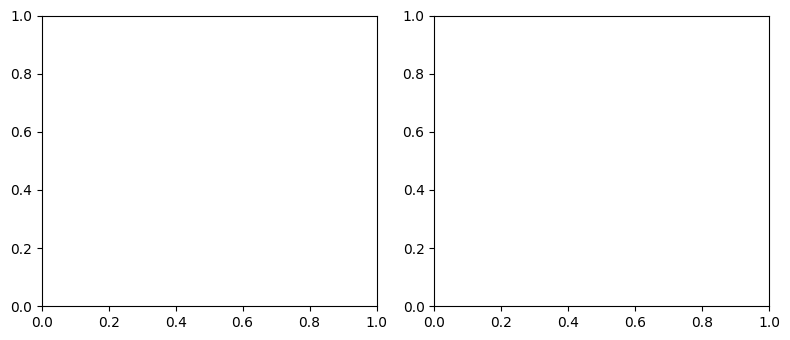

In [1]:
import pandas as pd

sex_dict = {0: "Nữ", 1: "Nam"}

d = pd.read_excel("../assets/hrm.xlsx") \
    .replace({
        "sex": sex_dict,
    })


import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(8, 3.5), tight_layout=True)
plt.show()

Do biến `axs` ở trên là một mảng các `Axes`, chúng ta có thể sử dụng chỉ mục để truy cập vào từng hệ trục tọa độ.

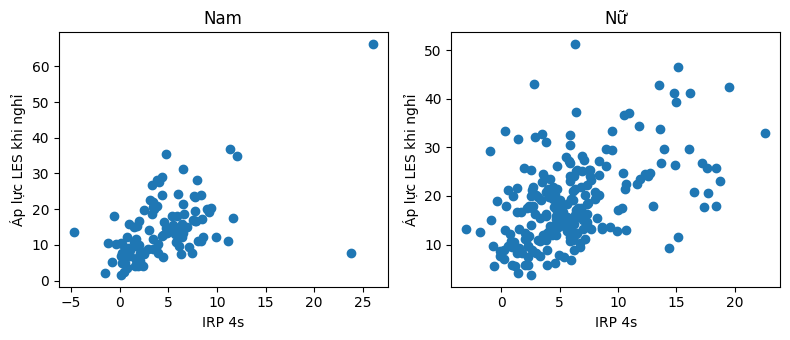

In [2]:
d_grpby = d.groupby("sex")

fig, axs = plt.subplots(ncols=2, figsize=(8, 3.5), tight_layout=True)

for i, group in enumerate(d_grpby.groups):
    data = d_grpby.get_group(group)
    ax = axs[i]
    ax.scatter("les_irp4s", "les_baserestp", data=data)
    ax.set(title=group, xlabel="IRP 4s", ylabel="Áp lực LES khi nghỉ")

plt.show()

Bạn có thể thiết lập để các biểu đồ này dùng chung (share) một trục tọa độ.

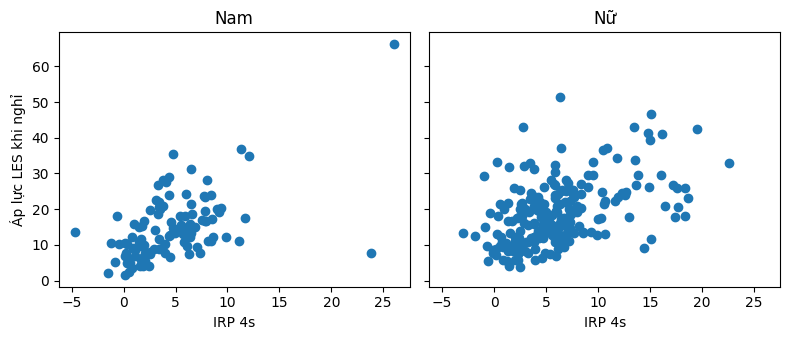

In [3]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 3.5), tight_layout=True,
    sharex=True, sharey=True)

for i, group in enumerate(d_grpby.groups):
    data = d_grpby.get_group(group)
    ax = axs[i]
    ax.scatter("les_irp4s", "les_baserestp", data=data)
    if i == 0:
        ax.set(title=group, xlabel="IRP 4s", ylabel="Áp lực LES khi nghỉ")
    else:
        ax.set(title=group, xlabel="IRP 4s")

plt.show()

Bạn có thể thiết lập tiêu đề chung cho toàn bộ hình. Đây có lẽ là lần đầu tiên chúng ta sử dụng đối tượng `fig` (có kiểu dữ liệu là lớp `Figure`).

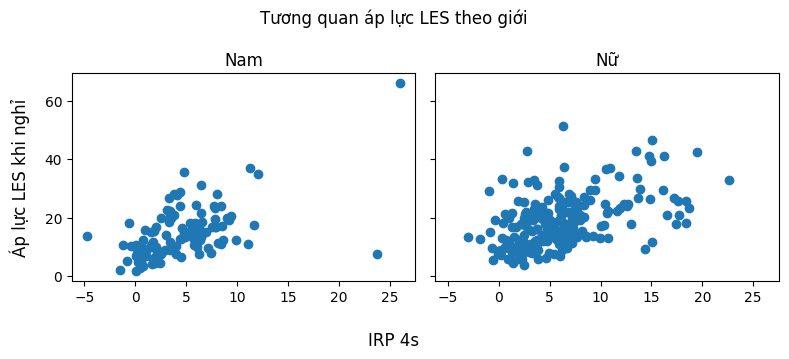

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 3.5), tight_layout=True,
    sharex=True, sharey=True)

for i, group in enumerate(d_grpby.groups):
    data = d_grpby.get_group(group)
    ax = axs[i]
    ax.scatter("les_irp4s", "les_baserestp", data=data)
    ax.set(title=group)

fig.suptitle("Tương quan áp lực LES theo giới")
fig.supxlabel("IRP 4s")
fig.supylabel("Áp lực LES khi nghỉ")

plt.show()

Khi có nhiều hệ trục tọa độ, bạn sẽ cần lưu ý cách hiển thị chú thích. Như ví dụ dưới đây, chú thích sẽ được hiển thị ở cả hai biểu đồ.

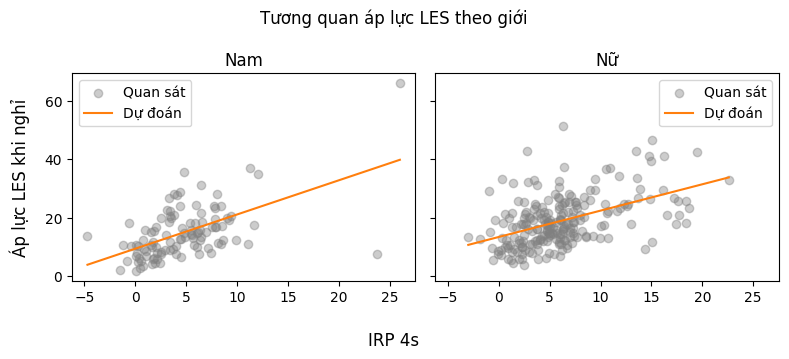

In [5]:
import statsmodels.api as sm

def get_bestfit(data: pd.DataFrame, x_var, y_var):
    fml = f"{y_var} ~ {x_var}"
    model = sm.OLS.from_formula(fml, data=data)
    fit = model.fit()
    x_min, x_max = data[x_var].agg(["min", "max"])
    y_min, y_max = fit.predict({x_var: [x_min, x_max]})
    return (x_min, x_max), (y_min, y_max)


fig, axs = plt.subplots(ncols=2, figsize=(8, 3.5), tight_layout=True,
    sharex=True, sharey=True)

for i, group in enumerate(d_grpby.groups):
    data = d_grpby.get_group(group)
    (x_min, x_max), (y_min, y_max) = get_bestfit(data, "les_irp4s", "les_baserestp")
    ax = axs[i]
    ax.scatter("les_irp4s", "les_baserestp", data=data, c="gray", alpha=.4, label="Quan sát")
    ax.plot((x_min, x_max), (y_min, y_max), c="C1", label="Dự đoán")
    ax.set(title=group)
    ax.legend()

fig.suptitle("Tương quan áp lực LES theo giới")
fig.supxlabel("IRP 4s")
fig.supylabel("Áp lực LES khi nghỉ")

plt.show()

Do hai biểu đồ này có tính chất giống nhau, có thể bạn chỉ muốn một khung chú thích hiển thị chung cho cả hai. Thay vì sử dụng `Axes.legend()`, chúng ta sẽ thử sử dụng `Figure.legend()`.

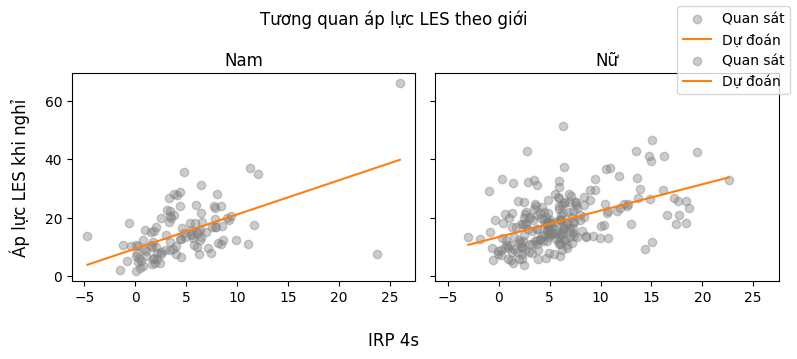

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 3.5), tight_layout=True,
    sharex=True, sharey=True)

for i, group in enumerate(d_grpby.groups):
    data = d_grpby.get_group(group)
    (x_min, x_max), (y_min, y_max) = get_bestfit(data, "les_irp4s", "les_baserestp")
    ax = axs[i]
    ax.scatter("les_irp4s", "les_baserestp", data=data, c="gray", alpha=.4, label="Quan sát")
    ax.plot((x_min, x_max), (y_min, y_max), c="C1", label="Dự đoán")
    ax.set(title=group)

fig.legend()

fig.suptitle("Tương quan áp lực LES theo giới")
fig.supxlabel("IRP 4s")
fig.supylabel("Áp lực LES khi nghỉ")

plt.show()

Ví trị của khung chú thích không được ổn lắm. Ngoài ra, chúng ta cũng thấy nội dung của nó bị lặp. Để khắc phục điều này, bạn có thể chỉ đặt label cho trục tọa độ cuối cùng.

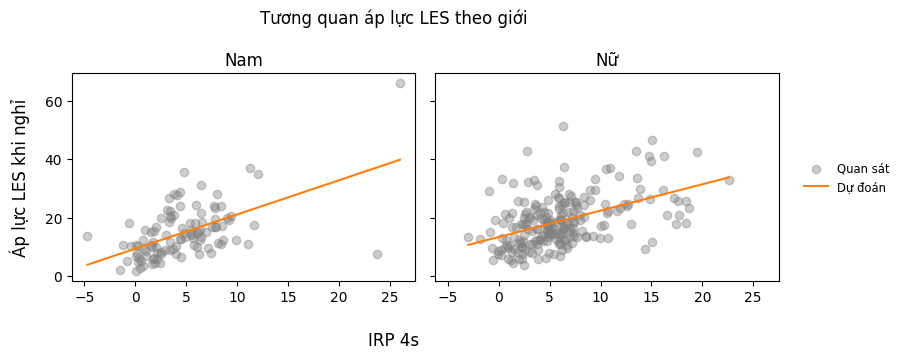

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 3.5), tight_layout=True,
    sharex=True, sharey=True)

for i, group in enumerate(d_grpby.groups):
    data = d_grpby.get_group(group)
    (x_min, x_max), (y_min, y_max) = get_bestfit(data, "les_irp4s", "les_baserestp")
    ax = axs[i]
    ax.scatter("les_irp4s", "les_baserestp", data=data, c="gray", alpha=.4,
        label="Quan sát" if i == len(d_grpby.groups) - 1 else None)
    ax.plot((x_min, x_max), (y_min, y_max), c="C1",
        label="Dự đoán" if i == len(d_grpby.groups) - 1 else None)
    ax.set(title=group)

fig.legend(frameon=False, fontsize="small", loc="center left", bbox_to_anchor=(1, 0.5))

fig.suptitle("Tương quan áp lực LES theo giới")
fig.supxlabel("IRP 4s")
fig.supylabel("Áp lực LES khi nghỉ")

plt.show()

### Nhiều biểu đồ với tỉ lệ kích cỡ khác nhau

Chúng ta sẽ vẽ một hình gồm có một scatter plot và hai histogram ở trục X và Y để hiển thị phân bố của hai biến liên tục. Với tình huống này, chúng ta muốn dành đa số diện tích cho scatter plot. Hãy chú ý hai đối số "ratios" dưới đây.

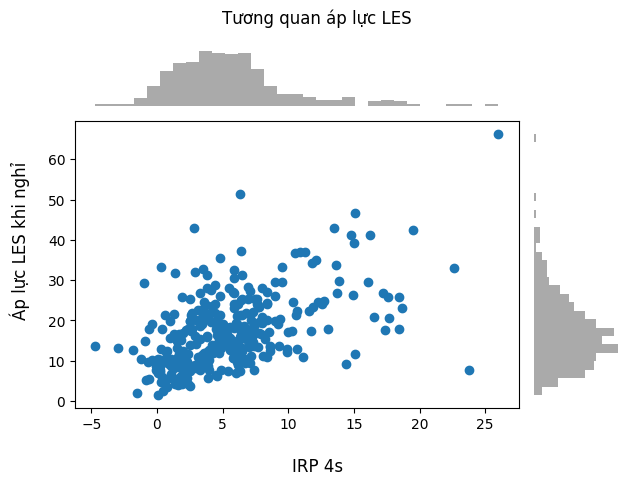

In [8]:
fig, ((ax_top, ax_notused), (ax_scatter, ax_right)) = plt.subplots(nrows=2, ncols=2, tight_layout=True,
    width_ratios=[5, 1], height_ratios=[1, 5])

ax_scatter.scatter("les_irp4s", "les_baserestp", data=d)

ax_top.hist(d["les_irp4s"], bins=31, color="#aaa")
ax_top.set_axis_off()

ax_right.hist(d["les_baserestp"], bins=31, color="#aaa", orientation="horizontal")
ax_right.set_axis_off()

ax_notused.set_axis_off()

fig.suptitle("Tương quan áp lực LES")
fig.supxlabel("IRP 4s")
fig.supylabel("Áp lực LES khi nghỉ")


plt.show()

## Thêm trục tọa độ thứ ba

Trong ví dụ tiếp theo, chúng ta sẽ khảo sát tương quan giữa số ca Covid-19 mới mắc trong ngày và mức độ ở trong nhà của người dân theo báo cáo di chuyển (mobility report) của Google. Trước hết, hãy xem bộ số liệu và vẽ riêng các biểu đồ.

In [9]:
d = pd.read_csv("../assets/covid_data.csv", parse_dates=["date"])
d.head()

,date,residential,new_cases
0,2021-01-01,3,9
1,2021-01-02,1,9
2,2021-01-03,-3,8
3,2021-01-04,-3,12
4,2021-01-05,-4,3


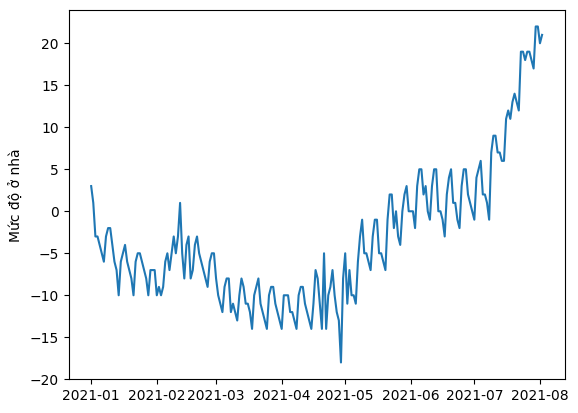

In [10]:
plt.plot("date", "residential", data=d)
plt.ylabel("Mức độ ở nhà")
plt.show()

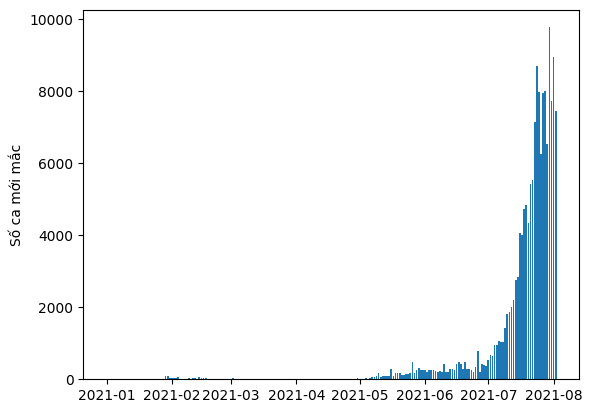

In [11]:
plt.bar("date", "new_cases", data=d)
plt.ylabel("Số ca mới mắc")
plt.show()

Nếu bạn vẽ chung hai biểu đồ này với nhau, bạn sẽ không thể nhìn thấy biểu đồ đường thể hiện mức độ ở nhà vì số lượng ca mới mắc quá lớn. Vậy cách tốt nhất là chúng ta có hai trục Y khác nhau. Hãy cùng xem cách thức tạo ra trục Y thứ hai.

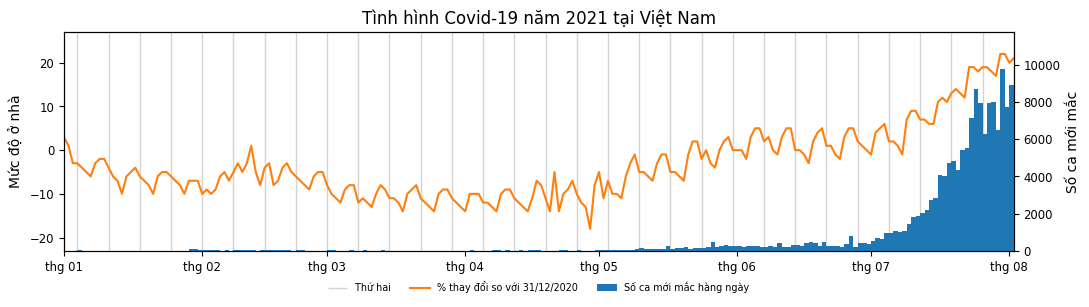

In [12]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(11, 3.2), tight_layout=True)

# Vẽ các đường kẻ dọc là thứ hai đầu tuần
mondays = d.loc[d["date"].dt.dayofweek == 0, "date"]
y_min, y_max = d["residential"].agg(["min", "max"])
ax.vlines(mondays, y_min - 5, y_max + 5, colors="lightgray", lw=1, label="Thứ hai")

# Vẽ ở trục Y thứ nhất
ax.plot("date", "residential", data=d, c="C1", label="% thay đổi so với 31/12/2020")
ax.set_ylabel("Mức độ ở nhà")
ax.set_ylim(y_min - 5, y_max + 5)
ax.tick_params(labelsize="small")

# Tạo ra trục Y thứ hai
twinx = ax.twinx()
twinx.bar("date", "new_cases", data=d, width=1, align="edge", label="Số ca mới mắc hàng ngày")
twinx.set_ylabel("Số ca mới mắc")
twinx.set_ylim(0, d["new_cases"].max() + 2000)
twinx.tick_params(labelsize="small")

# Trục X chung giữa hai hệ trục tọa độ
# nên chỉ cần thiết lập xlim() cho ax là đủ
x_min, x_max = d["date"].agg(["min", "max"])
ax.set_xlim(x_min, x_max)
ax.xaxis.set_major_formatter(DateFormatter("thg %m"))

# Tạo legend chung cho hai hệ trục tọa độ
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = twinx.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2,
    ncols=3, frameon=False, fontsize="x-small", loc="upper center", bbox_to_anchor=(.5, -.1))

ax.set_title("Tình hình Covid-19 năm 2021 tại Việt Nam")

plt.show()

Để tạo ra một trục tọa độ thứ hai, chúng ta dùng hàm `twinx()` hoặc `twiny()`. Hàm `twinx()` sẽ giữ nguyên trục X, và do đó tạo thêm trục Y thứ hai (và ngược lại). Khung chú thích ở hệ trục tọa độ gốc sẽ không hiển thị những đối tượng ở hệ trục tọa độ "song sinh" thứ hai này, do đó, chúng ta cần kết hợp chú thích của cả hai hệ trục tọa độ với nhau.

Việc vẽ chung hai thông tin này có nhiều ưu điểm, ví dụ, chúng ta thấy được rằng:

* Giữa tuần mọi người đi ra ngoài nhiều hơn rõ rệt, cuối tuần ở nhà nhiều hơn.
* Vào những đợt dịch bùng phát, mọi người ở nhà nhiều hơn rõ rệt. Tuy nhiên, sau làn sóng nhỏ đầu năm 2021, có thể thấy mọi người đi ra ngoài nhiều hơn hẳn so với trước dịch.

---

[Bài trước](./06_axis.ipynb) - [Danh sách bài](../README.md) - [Bài sau](./08_text.ipynb)